In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
insurance_data = pd.read_csv("insurance.txt", delimiter=',')

In [8]:
insurance_data

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [9]:
norm_insu_data = ((insurance_data-insurance_data.mean())/(insurance_data.std()))
norm_insu_data.insert(0, 'x0', 1) #x0 is appeneded to allow for the zeroth order term

In [10]:
#normalised data frame

norm_insu_data

,x0,age,bmi,children,charges
0,1,-1.438227,-0.453151,-0.908274,0.298472
1,1,-1.509401,0.509431,-0.078738,-0.953333
2,1,-0.797655,0.383164,1.580335,-0.728402
3,1,-0.441782,-1.305043,-0.908274,0.719574
4,1,-0.512957,-0.292447,-0.908274,-0.776512
...,...,...,...,...,...
1333,1,0.768185,0.050278,1.580335,-0.220468
1334,1,-1.509401,0.206062,-0.908274,-0.913661
1335,1,-1.509401,1.014499,-0.908274,-0.961237
1336,1,-1.295877,-0.797515,-0.908274,-0.930014


In [11]:
#creating a list of 20 data_frames that have been shuffled

dataset_list=list()
dataset_list.append(norm_insu_data.sample(frac=1))
for i in range(1,20):
    dataset_list.append(dataset_list[-1].sample(frac=1))


In [12]:
# Splitting the datasets into testing and training

training_data_list = [None]*20
testing_data_list = [None]*20

for i in range(20):
    training_data_list[i] = dataset_list[i].sample(frac=0.7)
    testing_data_list[i] = dataset_list[i].drop(training_data_list[i].index)

In [13]:
# Normal equation method to find regression model

indep_attrs = ["x0", "age", "bmi", "children"]
dep_attr = ["charges"]

testing_err_norm = []
training_err_norm = []
for i in range(20):
    
    #Calculating the weights
    X_train = training_data_list[i][indep_attrs].to_numpy() 
    Y_train = training_data_list[i][dep_attr].to_numpy()
    XT_train = X_train.transpose()

    X_test = testing_data_list[i][indep_attrs].to_numpy() 
    Y_test = testing_data_list[i][dep_attr].to_numpy()
    theta = np.matmul(np.linalg.inv(np.matmul(XT_train,X_train)),np.matmul(XT_train,Y_train))
    
    #Calculating RMSE for training data
    diff_train = np.subtract(np.matmul(X_train, theta), Y_train)
    diffT_train = diff_train.transpose()
    sumsq_train = np.matmul(diffT_train, diff_train)[0][0]
    rmse_train = np.sqrt(sumsq_train/(Y_train.shape[0]))
    training_err_norm.append(rmse_train)
    
    #Calculating RMSE for testing data

    diff_test = np.subtract(np.matmul(X_test, theta), Y_test)
    diffT_test = diff_test.transpose()
    sumsq_test = np.matmul(diffT_test, diff_test)[0][0]
    rmse_test = np.sqrt(sumsq_test/(Y_test.shape[0]))
    testing_err_norm.append(rmse_test)

In [14]:
#GRADIENT DESCENT
def gradient_descent(x, y, iterations, eta, x_test, y_test, precis):
    
    theta = np.random.rand(x.shape[1],1)
    m = y.shape[0]
    n = y_test.shape[0]
    past_costs = []
    past_costs_test= []
    past_rmse= []
    past_rmse_test= []
    for i in range(iterations):
        
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost[0][0])
        rmse_train = np.sqrt((2*(cost[0][0])))
        past_rmse.append(rmse_train)
        theta = theta - (eta * (1/m) * np.dot(x.T, error))
        
        prediction_test = np.dot(x_test, theta)
        error_test = prediction_test - y_test
        cost_test = 1/(2*n) * np.dot(error_test.T, error_test)
        past_costs_test.append(cost_test[0][0])
        rmse_test = np.sqrt((2*cost_test[0][0]))
        past_rmse_test.append(rmse_test)
        
        if((len(past_costs) > 1) and abs(past_costs[-2]-past_costs[-1]) <= precis):
            break
            
    return theta, past_costs, past_costs_test, past_rmse, past_rmse_test


In [15]:
np.random.seed(123)
rmse_train_grad_desc = [None]*20
rmse_test_grad_desc = [None]*20
past_costs = [None]*20
past_costs_test = [None]*20
precision = 0.000001
eta = 0.01
iterations = 2000
for i in range(20):
    
    X_train = training_data_list[i][indep_attrs].to_numpy() 
    Y_train = training_data_list[i][dep_attr].to_numpy()
    
    X_test = testing_data_list[i][indep_attrs].to_numpy() 
    Y_test = testing_data_list[i][dep_attr].to_numpy()
    
    final_theta, past_costs[i], past_costs_test[i], rmse_train_grad_desc[i], rmse_test_grad_desc[i] = gradient_descent(X_train, Y_train, iterations, eta, X_test, Y_test, precision)
    
    #printing error values for learning rate=0.01 , 20 models.
    print ("Error values (every 50th iteration) for model number",i+1,":-\n")
    for x in range(len(rmse_train_grad_desc[i])): 
        if x%50==0:
            print(rmse_train_grad_desc[i][x], sep = "\n") 
    print ("\n")


Error values (every 50th iteration) for model number 1 :-

1.2627217987631432
1.0752204029235584
0.9971091970207056
0.9666125943705539
0.9550621729105888
0.9507379984021853
0.9491247734963395
0.9485231061114123
0.9482985055322486


Error values (every 50th iteration) for model number 2 :-

1.5982482892494703
1.1969895761383127
1.0202261073268197
0.9504980848833535
0.9247163584457013
0.9154403530250513
0.9121309516888247
0.9109511215454758
0.9105295767355571
0.9103784578399791


Error values (every 50th iteration) for model number 3 :-

1.270167631507984
1.0717886921574968
0.9898803457324864
0.9582658804584496
0.9464362259215137
0.9420593863732256
0.940444768082931
0.9398490520128073
0.9396290088977219


Error values (every 50th iteration) for model number 4 :-

1.28919059444843
1.100671707678369
1.0215634308071193
0.9902053739472143
0.9780646005775534
0.973390195234291
0.9715866556861754
0.97088731495504
0.9706145402759159
0.9705075053655129


Error values (every 50th iteration) for mo

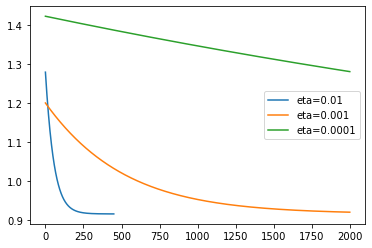

In [16]:
#now using 20th model to compare effect of learning rate on GD

X_train = training_data_list[19][indep_attrs].to_numpy() 
Y_train = training_data_list[19][dep_attr].to_numpy()
    
X_test = testing_data_list[19][indep_attrs].to_numpy() 
Y_test = testing_data_list[19][dep_attr].to_numpy()

precision = 0.000001
eta2=0.001
eta3=0.0001

final_theta2, past_costs2, past_costs_test2, rmse_train_grad_desc2, rmse_test_grad_desc3 = gradient_descent(X_train, Y_train, iterations, eta2, X_test, Y_test, precision)
final_theta3, past_costs3, past_costs_test3, rmse_train_grad_desc3, rmse_test_grad_desc3 = gradient_descent(X_train, Y_train, iterations, eta3, X_test, Y_test, precision)

plt.plot(rmse_train_grad_desc[19], label="eta=0.01")
plt.plot(rmse_train_grad_desc2, label="eta=0.001")
plt.plot(rmse_train_grad_desc3, label="eta=0.0001")
plt.legend()


In [31]:
# STOCHASTIC Gradient Descent

def stoch_grad(x, y, iterations, eta, x_test, y_test, precis):
    theta = np.random.rand(x.shape[1],1)
    m = y.shape[0]
    n = y_test.shape[0]
    past_costs = []
    past_costs_test= []
    past_rmse= []
    past_rmse_test= []
    print(x.shape[0])
    for i in range(iterations):
        np.random.shuffle(x)
        mse = 0
        for j in range(x.shape[0]):
            row_j = np.matrix(x[j])
            prediction = np.matmul(row_j, theta)
            xT = row_j.transpose()
            diff = prediction - np.matrix(y[j])
            theta = theta - eta*np.matmul(xT, diff)
        
        diff_t = np.matmul(x, theta)-y
        mse = (1/m)*(np.matmul(diff_t.T, diff_t))
        mse_val = np.array(mse)[0][0]
        past_costs.append(mse_val)
        past_rmse.append(np.sqrt(mse_val))
        if((len(past_costs) > 1) and abs(past_costs[-2]-past_costs[-1]) <= precis):
            break
        
    return past_rmse
            

In [32]:
rmse_train_stoch_grad = stoch_grad(X_train, Y_train, 600, eta, X_test, Y_test, precision)

937


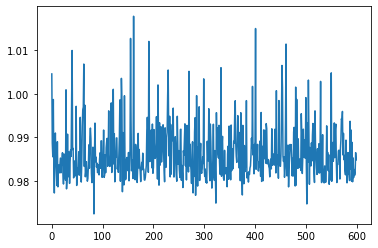

In [35]:
plt.plot(rmse_train_stoch_grad)